# 第八讲 文件操作

## <font size=5><span id="8.1"> 8.1 文本文件</span></font>

### <font size=4><span id="8.1.1"> 8.1.1 打开文件函数 — open</span></font>  

- 语法
```python
# 常用方式
>>> file_stream = open(file, mode)
# 函数原型
>>> file_stream = open(file, mode='r',
                    buffering=-1, encoding=None, errors=None,
                    newline=None, closefd=True, opener=None)
```


- 功能 —— 打开文件
    - 如果打开成功，则返回文件流对象
    - 如果打开失败，则抛出 OSError 异常


- 参数
    - file 文本或字符串，给定待打开的文件名，或文件号
    - mode 指定打开模式，缺省值为 r，表示以只读文本方式打开
    - encoding 指定编码方式，缺省值与平台有关，任何 python 支持的编码方式都可传入。详见 codecs 模块


- 返回值 —— 文件流（stream）对象

### <font size=4><span id="8.1.2"> 8.1.2 打开文件的模式 — 参数 mode</span></font>  


- 记忆要点
    - r —— read 读
    - w —— write 写
    - a —— append 添
    - \+ —— 可读写
    - b —— binary 二进制

#### (1) 打开文件的访问模式

<table>
<thead>
    <tr><th style='text-align:center;' ><strong>访问模式</strong></th><th><strong>说明</strong></th></tr>
</thead>
<tbody>
    <tr><td style='text-align:center;' >r</td><td>以只读方式打开文件。文件的指针将会放在文件的开头。这是默认模式。</td></tr>
    <tr><td style='text-align:center;' >w</td><td>打开一个文件只用于写入。<font color="red">如果该文件已存在则将其覆盖</font>。如果该文件不存在，创建新文件。</td></tr>
    <tr><td style='text-align:center;' >x</td><td>创建一个新文件，并以写入模式将其打开。</td></tr>
    <tr><td style='text-align:center;' >a</td><td>打开文件用于追加。若已存在，指针置于尾部，新内容添加在后。若不存在，创建新文件进行写入。</td></tr>
    <tr><td style='text-align:center;' >b</td><td>以二进制模式打开。</td></tr>
    <tr><td style='text-align:center;' >t</td><td>以文本模式打开（缺省模式）。</td></tr>
    <tr><td style='text-align:center;' >+</td><td>打开文件用于更新，读或写。</td></tr>
    <tr><td style='text-align:center;' >U</td><td>以通用新行(newline)模式打开文件(未来将弃用)。</td></tr>
</tbody>
</table>

#### (2) 打开文件的组合模式

<table>
<thead>
    <tr><th style='text-align:center;' ><strong>组合模式</strong></th><th><strong>说明</strong></th></tr>
</thead>
<tbody>
<tr><td style='text-align:center;' >rb</td><td>以二进制只读模式打开文件，指针置于开头，默认模式。</td></tr>
    <tr><td style='text-align:center;' >wb</td><td>以二进制写入模式打开文件，若已存在则覆盖，若不存在，则建新文件。</td></tr>
    <tr><td style='text-align:center;' >ab</td><td>以二进制追加模式打开文件，若已存在，指针置于结尾，新内容写入在后；若不存在，建新文件进行写入。</td></tr>
    <tr><td style='text-align:center;' >r+</td><td>以读写模式打开文件，指针置于开头。</td></tr>
    <tr><td style='text-align:center;' >w+</td><td>以读写模式打开文件，若已存在则覆盖，若不存在，创建新文件。</td></tr>
    <tr><td style='text-align:center;' >a+</td><td>以追加模式打开文件，若已存在，指针置于结尾；若不存在，创建新文件用于读写。</td></tr>
    <tr><td style='text-align:center;' >rb+</td><td>以二进制读写模式打开文件，指针置于开头。</td></tr>
    <tr><td style='text-align:center;' >wb+</td><td>以二进制读写模式打开文件，若已存在则覆盖；若不存在，创建新文件。</td></tr>
    <tr><td style='text-align:center;' >ab+</td><td>以二进制追加模式打开文件，若已存在，指针置于结尾；若不存在，创建新文件用于读写。</td></tr>
</tbody>
</table>

#### 查看文本文件


- files\chapter08\ENPoem.txt
- files\chapter08\CNPoem.txt

In [1]:
# DOS 命令查看，注意到乱码 (utf8)
!type files\chapter08\CNPoem.txt

绐楀墠鏄庢湀鍏�
鐤戜技鍦颁笂闇�
涓惧ご鏈涙槑鏈�
浣庡ご鎬濇晠涔�


 #### UTF编码
<img src = "images\chapter08\utf.jpg" width = 500>

- ANSI
    - ANSI是一种字符代码，为使计算机支持更多语言，通常使用 0x00~0x7f 范围的1 个字节来表示 1 个英文字符。
    - 超出此范围的使用0x80~0xFFFF来编码，即扩展的ASCII编码。
    - 比如：汉字 '中' 在中文操作系统中，使用 [0xD6,0xD0] 这两个字节存储。
    - 不同的国家和地区制定了不同的标准，由此产生了 GB2312、GBK、GB18030、Big5、Shift_JIS 等各自的编码标准。
    - 这些使用多个字节来代表一个字符的各种汉字延伸编码方式，称为 ANSI 编码。
- UTF-8
    - 一种可变长度字符编码
    - 可以用来表示Unicode标准中的任何字符，而且其编码中的第一个字节仍与ASCII相容，使得原来处理ASCII字符的软件无须或只进行少部分修改后，便可继续使用。
    - 成为电子邮件、网页及其他存储或传送文字的应用中，优先采用的编码。

<img src="images\chapter08\encodeing.png">

<img src="images\chapter08\ASCII_utf8_unicode.jpg">

|char|	ANSI(GBK)|	ANSI(Big5)	|ANSI(JIS)|	Unicode	UTF-8|
|-|-|-|-|-|
|文	|0xCEC4|	0xA4E5|	0x95B6|	0x6587|	0xE69687|

- 可以看出，不同ANSI编码之间互不兼容，当信息在国际间交流时，无法将属于两种语言的文字，存储在同一段ANSI编码的文本中。需要将不同的ANSI编码都转换成UTF-8编码，进而存储。

### <font size=4><span id="8.1.3"> 8.1.3 文件对象的常用操作方法</span></font> 

- 最常用的方法如下表



<figure>
<table>
<thead>
    <tr><th>文件对象方法</th><th>执行操作</th></tr>
</thead>
    
<tbody>
    <tr><td>close()</td><td>关闭文件</td></tr>
    <tr><td>read(size == -1)</td><td>从文件读取size个字符，<br>当未给定size或给定负值的时候，读取剩余的所有字符，然后作为字符串返回</td></tr>
    <tr><td>readline()</td><td>从文件中读取一行字符串</td></tr>
    <tr><td>readlines()</td><td>从文件中读取多行字符串</td></tr>
    <tr><td>write(str)</td><td>将字符串 str 写入文件</td></tr>
    <tr><td>writelines(seq)</td><td>向文件写入字符串序列seq，seq应该是一个返回字符串的可迭代对象</td></tr>
    <tr><td>seek(offset, from)</td><td>在文件中移动文件指针，<br>从from(0代表文件头部，1代表当前位置，2代表文件末尾)偏移offset个字节</td></tr>
    <tr><td>tell()</td><td>返回当前在文件中的位置</td></tr>
</tbody>
</table>
</figure>


- 了解全部的方法，运行
```python
>>> dir(file)
```

#### 8.1.3.1 读全部行函数 — readlines


- 语法
```python
>>> file.readlines()
```


- 功能 —— 返回所有行组成的列表

In [2]:
# ANSI 编码
file = open("files/chapter08/ENPoem.txt", mode='r')

for line in file.readlines():
    print(line,end="")

To see a world in a grain of sand,
And a heaven in a wild flower,
Hold infinity in the palm of your hand,
And eternity in an hour.

In [3]:
# 单独执行 readlines，竟然输出空列表，为什么？
file.readlines()

[]

In [4]:
# 关闭文件
file.close()

In [5]:
# 重新打开
file = open("files/chapter08/ENPoem.txt", mode='r')

In [6]:
# 单独执行 readlines，这次没有输出空列表，又为什么？
file.readlines()

['To see a world in a grain of sand,\n',
 'And a heaven in a wild flower,\n',
 'Hold infinity in the palm of your hand,\n',
 'And eternity in an hour.']

In [7]:
# 记住关闭文件是好习惯！！！
file.close()

#### 打开编码格式为 UTF-8 的文本文件，并逐行输出


- 设置参数 encoding="UTF-8"


- 问题
    - 如何知道文本文件的编码是 "UTF-8"？
    - 如何更改编码？

In [9]:
# 利用 chardet 模块查看本文文件的编码
# Anaconda 安装时已经自动安装 chardet
import chardet
file = open("files/chapter08/CNPoem.txt", mode='rb')
data = file.read()
file.close()
result = chardet.detect(data)
print(result) 

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [11]:
file = open("files/chapter08/CNPoem.txt", mode='r', encoding=result['encoding']) # UTF-8
for line in file.readlines():
    print(line, end="")
file.close()

窗前明月光
疑似地上霜
举头望明月
低头思故乡

#### 8.1.3.2 逐次读单行函数 —— readline


- 语法
```python
>>> file.readline()
```


- 功能 — 从文件指针当前所指位置处，读一单行


- 注意：文件指针隐性起作用

In [ ]:
file = open("files/chapter08/CNPoem.txt", mode='r', encoding="UTF-8")

In [ ]:
# 读第一行文本
file.readline()

In [ ]:
# 读第二行文本
file.readline()

In [ ]:
# 读第三行文本
file.readline()

In [ ]:
# 关闭文件，好习惯！
file.close()

#### 8.1.3.3 逐次读单行函数 —— read


- 语法
```python
>>> file.read(n=-1)
```


- 功能 — 按字节读取，如果不设置参数，那么会全部读进来，直到文件末尾


In [ ]:
file = open("files/chapter08/CNPoem.txt", mode='r', encoding="UTF-8")
file.read()

In [ ]:
file.close()

In [ ]:
file = open("files/chapter08/CNPoem.txt", mode='r', encoding="UTF-8")
file.read(10)

In [ ]:
file.close()

### <font size=4><span id="8.1.4"> 8.1.4 文件的关闭</span></font>  


- 调用 close 函数
```python
>>> file.close()
```


- 打开文件后，一定要记着关闭，这是好习惯，切记！！！

####  文件的读入案例之一：包罗万象的 $\pi$

In [ ]:
pifile = open("files/chapter08/PI.txt")    # 100 万位圆周率
content = pifile.read()
print(content)
pifile.close()

In [ ]:
# 原始数据处理
content = content.replace(' ','')        # 去除有可能的英文空格
content = content.replace('\n','')       # 去除有可能的换行符
content = content.replace('\u3000','')   # 去除有可能的中文空格

In [ ]:
len(content)  # 3 + 点 + 100 万小数

In [ ]:
#你的出生月日在pi里面么？
birthday = input("输入你的生日的月日mmdd格式：")
if content.find(birthday) > 0:
    print("Congratulations!")
else:
    print("Sorry")

In [ ]:
# 验证任意一个四位数都在pi里面出现

In [ ]:
for each in range(1000,9999): #try 10000~99999
    if content.find(str(each)) < 0:
        print(str(each)+" is not included")
        break
else:
    print("All number from 1000 to 9999 are include in PI")

### <font size=4><span id="8.1.6"> 8.1.6 文件的写入</span></font>  


- 注意
    - 若使用 w 模式，此前文件内容会全部被覆盖
    - 若想追加输出，应采用 a 模式

#### 向文件写或追加内容

In [ ]:
file_out = open("files\chapter08\output.txt","w")
file_out.write("时间过得好快\n转眼就到了深秋\n这是你来同济的第二个年头\n")
file_out.close()

In [ ]:
!type files\chapter08\output.txt

In [ ]:
file_out = open("files\chapter08\output.txt","a")    # 以追加模式重新打开文件
file_out.write("今天是2024年09月09日\n")
file_out.close()

In [ ]:
!type files\chapter08\output.txt

####  文件的写入案例：客户和密码
- 编写一个程序， 提示用户输入其名字； 
- 用户作出响应后， 将其名字写入到文件guest.txt中。

In [ ]:
#程序准备.........................
guest = open("files\chapter08\guest.txt","a+")
!type files\chapter08\guest.txt

In [ ]:
guest.seek(0, 0)  #没有这句会怎么样？
guest_password = guest.readlines()
print(guest_password)

In [ ]:
guest.close()

In [ ]:
guest = {}
for each in guest_password:
    a, b = each.split()
    guest[a] = b
guest

In [ ]:
#程序准备
#程序准备over.........................
# 提示用户输入姓名，如果已存在，则提示输入密码，密码正确这提示“登录成功”
# 否则提示“密码不正确”
# 如果用户名不存在，则提示“用户名不存在”

In [ ]:
guest_file = open("files\chapter08\guest.txt","a+")
guest_file.seek(0, 0)  #没有这句会怎么样？
guest_password = guest_file.readlines()
guest_file.close()
guest = {}
for each in guest_password:
    a, b = each.split(" ")
    guest[a] = b

name = input("请输入用户名：")
if name in guest.keys():
    mima = input("请输入密码：")
    if mima == guest[name]:
        print("{0},欢迎您,\n登陆成功！".format(name))
    else:
        print("{0},密码输入错误！".format(name))
else:
    print("用户名{0}不存在,请输入密码创建新用户".format(name))         # 注意，名字和密码不能带空格
    mima = input("请输入密码：")
    print("用户创建成功，请您记住用户名和密码！")
    # 更新用户名和密码文件
    guest = open("files\chapter08\guest.txt","a+")
    guest.write(name+' '+mima+'\n')
    guest.close()

### <font size=4><span id="8.1.7">8.1.7 with open as 文件打开方式</span></font>  


- 背景 — 虽然一再强调要关闭打开的文件，可是许多程序员
    - 经常忘记关闭打开的文件
    - 或者是已经关闭的文件，神经质地再次关闭
    - 虽然写了 close()，但是之前的代码出现错误导致程序中断，没有执行到 close()


- 怎么办？ —— 采用 with open as 文件打开方式时
    - 将在代码块结束后，自动调用 file.close()

#### 强烈推荐！！！

#### 使用 with open as 方式打开文件的例子

In [ ]:
with open("files\chapter08\ENPoem.txt") as file:  # 自动调用file.close()
    for each_line in file:
        print("文件关闭了" if file.closed else "文件尚未关闭")
        print(each_line, end='')

In [ ]:
print("文件关闭了" if file.closed else "文件尚未关闭")  #测试文件是否关闭

## <font size=5><span id="8.2"> 8.2 csv 文件</span></font>

In [ ]:
import csv
dir(csv)

### <font size=4><span id="8.2.1"> 8.2.1 csv 文件读操作</span></font>  


- 语法
```python
>>> csv_file = csv.reader(iterable[, dialect='excel'][, optional keyword args])
>>> for row in csv_file:
           process(row)
```

- 逗号分隔值（Comma-Separated Values，CSV，有时也称为字符分隔值，因为分隔字符也可以不是逗号），其文件以纯文本形式存储表格数据（数字和文本）。
- 纯文本意味着该文件是一个字符序列，不含必须像二进制数字那样被解读的数据。
- CSV文件由任意数目的记录组成，记录间以某种换行符分隔；每条记录由字段组成，字段间的分隔符是其它字符或字符串，最常见的是逗号或制表符。

### <font size=4><span id="8.2.2"> 8.2.2 csv 文件写操作</span></font>  


- 语法
```python
>>> csv_writer = csv.writer (fileobj [, dialect='excel'][, optional keyword args])
>>> for row in rows:
           csv_writer.writerow(row)
```
- 或
```python
>>> csv_writer = csv.writer (fileobj [, dialect='excel'][, optional keyword args])
>>> csv_writer.writerows(rows)
```


### 示例：奥运会数据分析

#### 1. 小试身手：男女运动员比例

In [43]:
# 打开文件，读取所有内容
import csv
with open(r"files\chapter08\Athletes_summer_games.csv", 'r', encoding = 'utf-8') as f:
    csv_reader = csv.reader(f)
    csv_list = []
    for each in csv_reader:
        csv_list.append(each)
        
header = csv_list[0]
data = csv_list[1:len(csv_list)]

In [44]:
# 文件中包含了多少届奥运会？
years = []
for each in data:
    if (each[6] not in years):
        years.append(each[6])
years.sort()  # games保存了文件中所有奥运会的年份

In [ ]:
# 接下来怎么处理？
# 再次遍历文件，把参加同一届奥运会的男、女运动员筛选出来，分别放入到列表中
# 注意：文件中是按照每一个 event（小项） 来记录的，因此存在同一个运动员的情况（例如，XX同时参加了乒乓球男单、男团，文件中就会存在两条记录）
# 因此，在筛选的基础上，需要去除重复的运动员

In [33]:
female_athlete_names = {}      # key = year, value = all female athlete names
male_athlete_names = {}
# 初始化
for year in years:
    female_athlete_names[year] = []
    male_athlete_names[year] = []

for each in data:
    year = each[6]
    sex = each[1]
    name = each[0]
    if sex == 'M':
        male_athlete_names[year].append(name)
    else:
        female_athlete_names[year].append(name)

# 去重
for year in female_athlete_names.keys():
    female_athlete_names[year] = list(set(female_athlete_names[year]))
    male_athlete_names[year] = list(set(male_athlete_names[year]))

# 统计人数
female_athlete_count = [];
male_athlete_count = [];
for year in female_athlete_names.keys():
    female_athlete_count.append(len(female_athlete_names[year]))
    male_athlete_count.append(len(male_athlete_names[year]))

# 比例
female_athlete_ratio = [];
male_athlete_ratio = [];
for i in range(len(female_athlete_count)):
    female_athlete_ratio.append(female_athlete_count[i]/(female_athlete_count[i]+male_athlete_count[i]))
    male_athlete_ratio.append(male_athlete_count[i]/(female_athlete_count[i]+male_athlete_count[i]))

C:\Users\panzichao\AppData\Local\Temp\ipykernel_9172\687159338.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


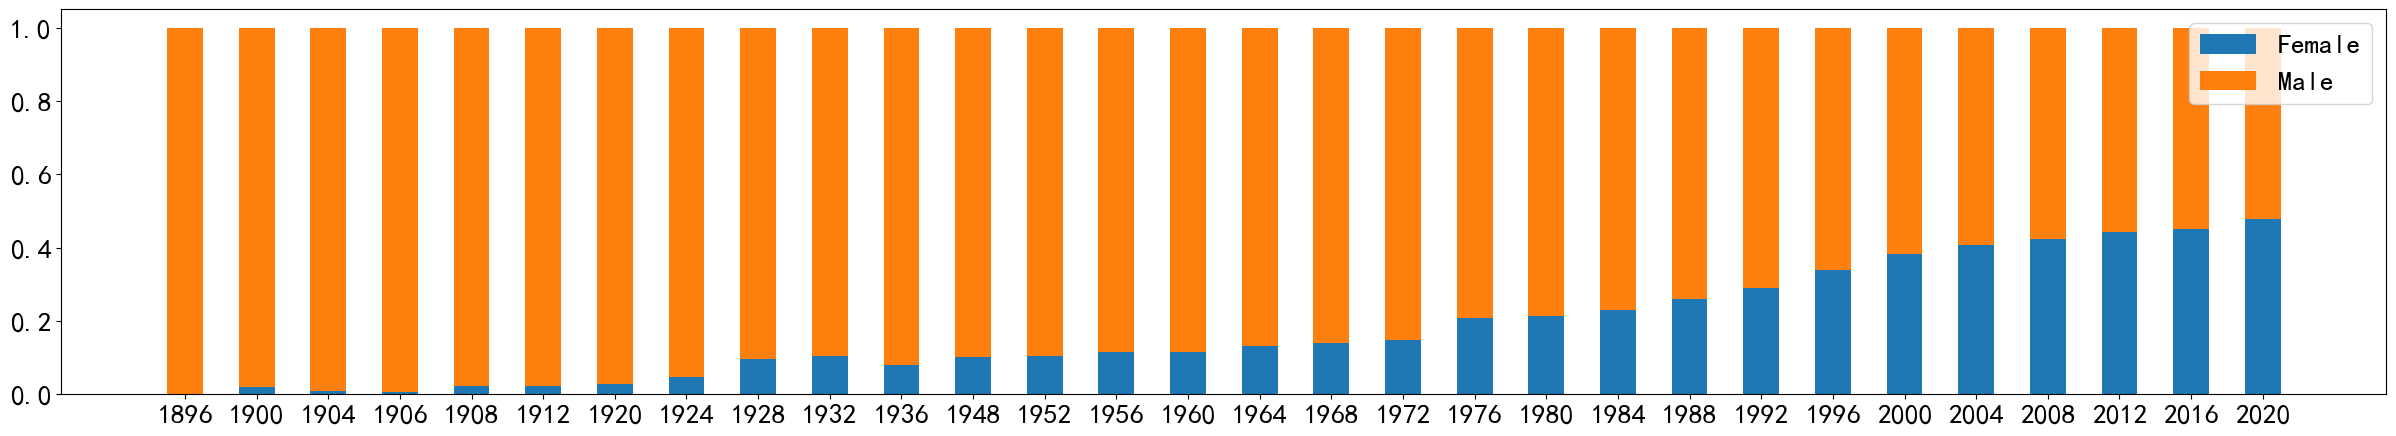

In [37]:
# 可视化
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font', family='SimHei', weight='bold')
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(30, 5), dpi=100)
width = 0.5
ax.bar(np.arange(len(female_athlete_ratio)), female_athlete_ratio, width=width, tick_label=years, label="Female")
ax.bar(np.arange(len(male_athlete_ratio)), male_athlete_ratio, bottom=female_athlete_ratio, \
       width=width, tick_label=years, label="Male")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(loc='upper right', fontsize=20)
fig.show()

#### 2. 来点难度：各代表团的优势项目

- 奥运会比赛：
  - 大项（sport），如：田径、乒乓球、跳水、游泳……
  - 小项（event），如：男子100米、乒乓球男子单打……
  - 一般一个小项产生一块金牌（有过并列冠军，发两块金牌的情况）
- 想一想：怎样才算是优势项目

In [91]:
# 打开文件，读取所有内容
import csv
with open(r"files\chapter08\Athletes_summer_games.csv", 'r', encoding = 'utf-8') as f:
    csv_reader = csv.reader(f)
    csv_list = []
    for each in csv_reader:
        csv_list.append(each)
        
header = csv_list[0]
data = csv_list[1:len(csv_list)]

# 文件中包含了多少届奥运会？
years = []
for each in data:
    if (each[6] not in years):
        years.append(each[6])
years.sort()  # games保存了文件中所有奥运会的年份

In [96]:
# 每届奥运会大项、小项设置都有可能不同，需要先筛选、统计    
# 这个字典的结构有点复杂，key = year，value = {}（嵌套一个列表，key = sport，value = [event_with_gold_medal]）
all_events = {}
gold_events = {}
for year in years:
    gold_events[year] = {}
    all_events[year] = {}
for each in data:
    year = each[6]
    sport = each[9]
    gold_events[year][sport] = []    # 每一届奥运会，某代表团每个大项中拿到金牌的小项名称
    all_events[year][sport] = []   # 每一届奥运会，每个大项中包含的所有小项名称

# 所谓优势项目，不在于某个 sport 中得了多少块金牌（绝对值）
# 而是某个 sport 中金牌数占这个 sport 中所有金牌的比例（相对值）
# 如果这个比例等于 1，则表明在这个 sport 中占据统治地位
target_noc = 'CHN'
for each in data:
    noc = each[4]
    year = each[6]
    sport = each[9]
    event = each[10]
    medal = each[11]
    if (event not in all_events[year][sport]):
        all_events[year][sport].append(event)
    if (noc == target_noc) and (medal == 'Gold') and (event not in gold_events[year][sport]):
        gold_events[year][sport].append(event)

In [97]:
# 接下来，可以计算出每一届奥运会每一个大项中，拿到的金牌数占这个大项所有金牌的比例
sport_gold_ratio = {}
for year in years:
    sport_gold_ratio[year] = {}
for each in data:
    year = each[6]
    sport = each[9]
    sport_gold_ratio[year][sport] = len(gold_events[year][sport]) * 1.0 / len(all_events[year][sport])

In [100]:
# 现在，可以输出一些有趣的结果了
# 比如，每一届奥运会，按照 sport_gold_ratio 排序并输出

for year in years:
    ratios = []
    for k,v in sport_gold_ratio[year].items():
        ratios.append((k, v))
    # 排序
    ratios.sort(key=lambda x:x[1], reverse=True)
    # 输出前几名
    print(f'{year:5s}', end='')
    for i in range(4):
        print(f'{ratios[i][0]:22s}:{ratios[i][1]:.3f}', end=' ')
    print('')

1896 Tennis                :0.000 Athletics             :0.000 Swimming              :0.000 Gymnastics            :0.000 
1900 Tug-Of-War            :0.000 Gymnastics            :0.000 Golf                  :0.000 Rowing                :0.000 
1904 Rowing                :0.000 Golf                  :0.000 Swimming              :0.000 Athletics             :0.000 
1906 Football              :0.000 Gymnastics            :0.000 Athletics             :0.000 Rowing                :0.000 
1908 Gymnastics            :0.000 Fencing               :0.000 Boxing                :0.000 Athletics             :0.000 
1912 Swimming              :0.000 Athletics             :0.000 Fencing               :0.000 Sailing               :0.000 
1920 Football              :0.000 Swimming              :0.000 Gymnastics            :0.000 Athletics             :0.000 
1924 Swimming              :0.000 Athletics             :0.000 Cycling               :0.000 Boxing                :0.000 
1928 Athletics          

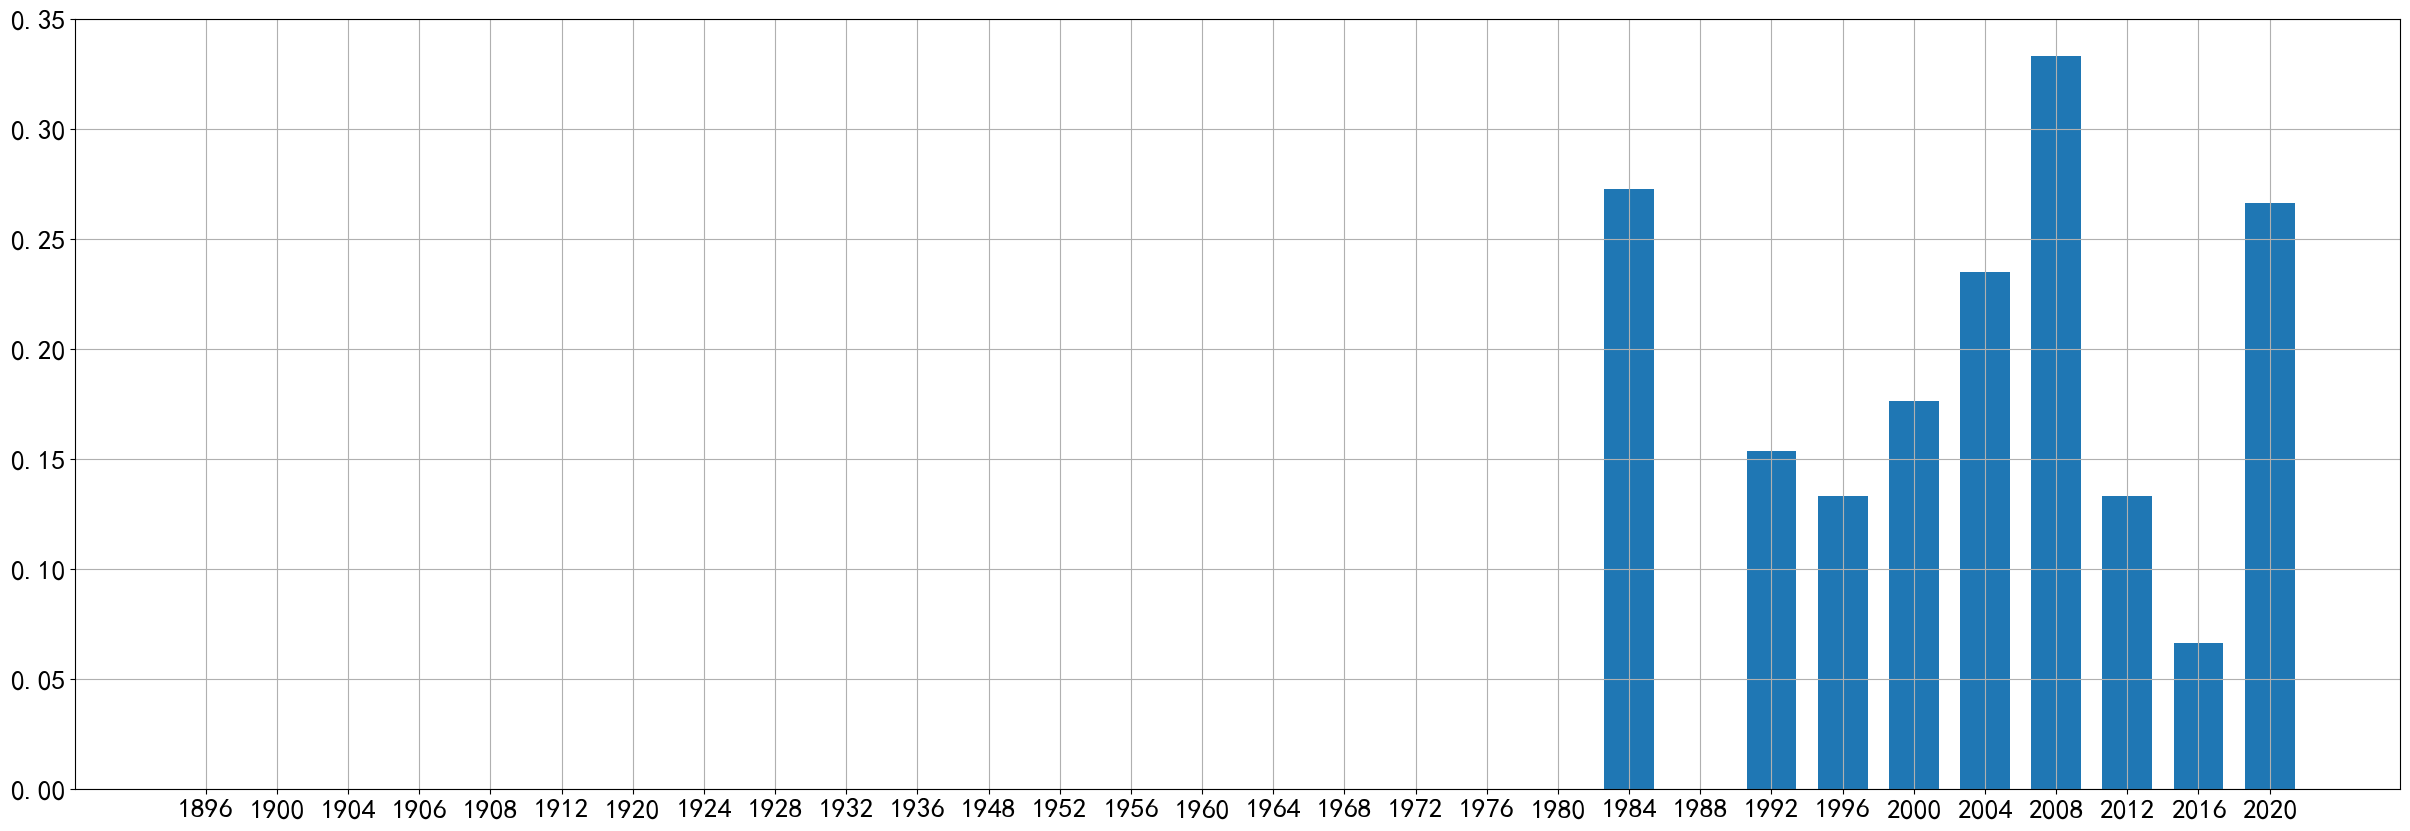

In [110]:
# 比如，某代表团优势项目的历年变化情况
target_sport = 'Shooting'
ratios = [0] * len(years)
for i in range(len(years)):
    year = years[i]
    for k,v in sport_gold_ratio[year].items():
        if (k == target_sport):
            ratios[i] = v

# 画图
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (30,10))
plt.bar(years,ratios,0.7)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()  # 生成网格

### <font size=4><span id="8.2.3"> 8.2.3 制作 Bar Chart Race</span></font>  


网址：app.flourish.studio

我们要做什么：

 - 原始数据的格式 --> Python --> flourish 要求的格式

剩下的交给 flourish 完成

### 案例一 全球主要国家/地区的GDP统计

In [114]:
import csv
import openpyxl as pxl

with open(r"files\chapter08\gdp_1960_2020.csv", 'r', encoding = 'utf-8') as f:
    csv_reader = csv.reader(f)
    raw_data = []
    for each in csv_reader:
        raw_data.append(each)
        
header = raw_data[0]
raw_data = raw_data[1:len(raw_data)]

# 去除错误数据和空数据
exist_wrong_record = True
while (exist_wrong_record == True):
    exist_wrong_record = False
    for record in raw_data:
        if (('N/A') in record) or ('' in record):
            exist_wrong_record = True
            break
    idx = raw_data.index(record)
    del raw_data[idx]

# 原始数据包含多少年
years = []
for record in raw_data:
    years.append(record[0])
years = sorted(set(years))

# 原始数据包含多少个国家/地区
countries = []
for record in raw_data:
    countries.append(record[2])
countries = sorted(set(countries))

gdp = {}
for year in years:
    gdp[year] = {}
    for country in countries:
        gdp[year][country] = 0

for record in raw_data:
    year = record[0]
    country = record[2]
    gdp[year][country] = float(record[4])

# 写入到 xlsx 文件中
wb = pxl.Workbook()                # 新建一个 xlsx 文件
ws = wb.active # 激活工作表（创建 xlsx，系统会默认创建一个 sheet1 工作表
ws.cell(row=1, column=1, value='Country/Region')
for i in range(len(years)):
    year = years[i]
    ws.cell(row=1, column=i+2, value=year)

for i in range(len(countries)):
    country = countries[i]
    ws.cell(row=i+2, column=1, value=country)

for i in range(len(countries)):
    country = countries[i]
    for j in range(len(years)):
        year = years[j]
        ws.cell(row=i+2, column=j+2, value=gdp[year][country]/100000000)
    
wb.save(r'files\chapter08\gdp_flourish_data.xlsx')
wb.close()

### 案例二 不同游戏平台的游戏销量

In [115]:
import csv
import openpyxl as pxl

with open("files/chapter08/Video_Games_Sales.csv", 'r') as f:
    csv_reader = csv.reader(f)
    raw_data = []
    for each in csv_reader:
        raw_data.append(each)
        
header = raw_data[0]
raw_data = raw_data[1:len(raw_data)]

# 去除错误数据和空数据
exist_wrong_record = True
while (exist_wrong_record == True):
    exist_wrong_record = False
    for record in raw_data:
        if (('N/A') in record) or ('' in record):
            exist_wrong_record = True
            break
    idx = raw_data.index(record)
    del raw_data[idx]

# 原始数据包含多少年
years = []
for record in raw_data:
    years.append(record[2])
years = sorted(set(years))

# 原始数据包含多少个平台
platforms = []
for record in raw_data:
    platforms.append(record[1])
platforms = sorted(set(platforms))

platform_global_sales = {}
for year in years:
    platform_global_sales[year] = {}
    for platform in platforms:
        platform_global_sales[year][platform] = 0

for record in raw_data:
    platform = record[1]
    year = record[2]
    global_sales = record[9]
    platform_global_sales[year][platform] += float(global_sales)

# 市场占有率
platform_global_market_shares = {}
for year in years:
    platform_global_market_shares[year] = {}
    count = 0.0
    for platform in platforms:
        count += float(platform_global_sales[year][platform])
    for platform in platforms:
        platform_global_market_shares[year][platform] = platform_global_sales[year][platform] / count
    
# 写入到 xlsx 文件中
wb = pxl.Workbook()                # 新建一个 xlsx 文件
ws = wb.active # 激活工作表（创建 xlsx，系统会默认创建一个 sheet1 工作表
ws.cell(row=1, column=1, value='Platform')
for i in range(len(years)):
    year = years[i]
    ws.cell(row=1, column=i+2, value=year)

for i in range(len(platforms)):
    platform = platforms[i]
    ws.cell(row=i+2, column=1, value=platform)

for i in range(len(platforms)):
    platform = platforms[i]
    for j in range(len(years)):
        year = years[j]
        ws.cell(row=i+2, column=j+2, value=platform_global_market_shares[year][platform])
    
wb.save('files/chapter08/Video_Games_Sales_flourish_data.xlsx')
wb.close()

## <font size=5><span id="8.3"> 8.3 二进制文件读取（pickle模块）</span></font>

- pickle.dump(obj, file, [,protocol])   
    - 函数的功能：将obj对象序列化存入已经打开的file中
    - protocal：如果该项省略，则默认为0。如果为负值或HIGHEST_PROTOCOL，则使用最高的协议版本。
- pickle.load(file)
    - 函数的功能：将file中的对象序列化读出。


In [16]:
import pickle
myList = {"姓名":"潘子超", "性别":"男", "本科毕业学校":"同济大学"}
pickleFile = open("files/chapter08/MyList.bin",'wb')
pickle.dump(myList, pickleFile)
pickleFile.close()
# 看看生成的文件

In [17]:
import pickle
pickleFile = open("files/chapter08/MyList.bin",'rb')
myList = pickle.load(pickleFile)
pickleFile.close()
print(myList)

{'姓名': '潘子超', '性别': '男', '本科毕业学校': '同济大学'}


In [18]:
import pickle  
dataList = [[1, 1, 'yes'],  
            [1, 1, 'yes'],  
            [1, 0, 'no'],  
            [0, 1, 'no'],  
            [0, 1, 'no']]  
dataDic = { 0: [1, 2, 3, 4],  
            1: ('a', 'b'),  
            2: {'c':'yes','d':'no'}} 
fw = open('files\chapter08\dataFile.txt','wb')
pickle.dump(dataList, fw) 
pickle.dump(dataDic, fw)  
fw.close() 

In [19]:
#使用load()将数据从文件中序列化读出  
fr = open('files\chapter08\dataFile.txt','rb')  
data1 = pickle.load(fr)  
print(data1)  
data2 = pickle.load(fr)  
print(data2)  
fr.close()

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
{0: [1, 2, 3, 4], 1: ('a', 'b'), 2: {'c': 'yes', 'd': 'no'}}


## <font size=5><span id="8.5"> 8.5 扩展学习 — 其它读取模块（自学）</span></font>


- io — 处理流的核心工具 [(官网)](https://docs.python.org/zh-cn/3.8/library/io.html)
- xlrd — 读 Excel 文件 [(官网)](https://github.com/python-excel/xlrd)
- xlwt — 写 Excel 文件 [(官网)](https://github.com/python-excel/xlwt)
- pdfminer — 读 pdf 文件中的数据文本 [(官网)](https://github.com/euske/pdfminer)
- lxml — 处理 HTML 和 XML 文件 [(官网)](https://lxml.de/)
- codecs — 支持多国语言的处理，面向任意编码 [(官网)](https://docs.python.org/zh-cn/3.8/library/codecs.html)
- json — 处理 json 文件 [(官网)](https://docs.python.org/zh-cn/3.8/library/json.html)

### Kaggle 数据集
https://www.kaggle.com/